# Linear dimensionality reduction

Perhaps the simplest and the most ubiquitous technique for dimensionality reduction is the principal component analysis (PCA). PCA is an unsupervised method which does not rely on any labels or hyperparameters and only requires a set of observations as an input. Typically we also might specify some $M<<D$ indicating the reduced dimensionality that we are aiming for; otherwise by default PCA would project the data into a subspace of the same dimensionality of the input (it will simply rotate the input data). 

Throughout the rest of the course, we will often motivate many of the more advanced dimensionality reduction techniques using PCA, therefore it is worth here motivating the PCA method from few different perspectives (although they all lead to the same scheme). We will start by first introducing the stardard PCA algorithm, which we later extend to the probabilistic PCA algorithm and a fully Bayesian model. 

# PCA - intuition

One way to think of PCA is as a procedure that rotates the data searching for the directions of the highest variance and then projects the data in the space defined by these directions. The first component is found by rotating the data in the direction of which the variance is the highest. Then, PCA "fixes" the data across the axis in the selected direction and continues looking for the rotation in the remaning axis that leads to maximum variance and so on. Each projection direction is orthogonal to all of the previous axis that have been selected by design. 
To achieve this first we assume that the data is centered at the origin; if not we subtract the mean of each variable (dimension) from the data set. Then, we compute the covariance of the data and calculate the eigenvectors and corresponding eigenvalues of this covariance. Assuming the eigenvectors are sorted by the size of their corresponding eigenvalues, the first $M$ of them define the first $M$ directions of the largest variance in the original data. The proportion of the variance that each eigenvector (direction defined by it) explains can be obtained by looking at the proportion of the corresponding eigenvalue from the sum of all eigenvalues. 

$\textbf{Demonstration of PCA on synthetic Gaussian data}$

Populating the interactive namespace from numpy and matplotlib


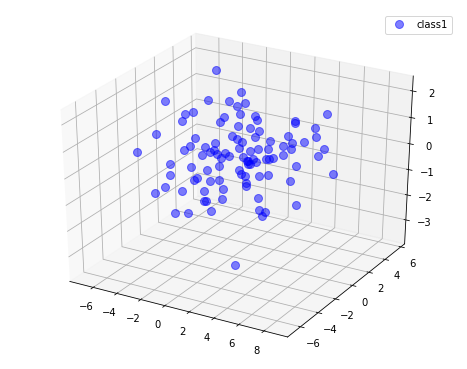

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

mu_vec = np.array([0,0,0])
cov_mat = np.array([[10,0,0],[0,5,0],[0,0,2]])
Y = np.random.multivariate_normal(mu_vec, cov_mat, 100).T


%pylab inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(Y[0,:], Y[1,:], Y[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.set_aspect('equal')
#ax.plot(Y[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

ax.legend(loc='upper right')

plt.show()

PC axes in terms of the measurement axes scaled by the standard deviations:
 [[ 0.64939111 -0.3788335   0.65937574]
 [-0.30128287 -0.9242962  -0.23431852]
 [ 0.6982262  -0.04649425 -0.71436578]]


/home/CAMPUS/raykovy/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: The PCA class was deprecated in version 2.2.
  This is separate from the ipykernel package so we can avoid doing imports until


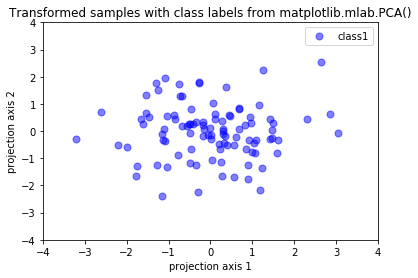

In [6]:
from matplotlib.mlab import PCA as mlabPCA

mlab_pca = mlabPCA(Y.T)

print('PC axes in terms of the measurement axes scaled by the standard deviations:\n', mlab_pca.Wt)

plt.plot(mlab_pca.Y[0:100,0],mlab_pca.Y[0:100,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')


plt.xlabel('projection axis 1')
plt.ylabel('projection axis 2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples with class labels from matplotlib.mlab.PCA()')

plt.show()

$\textbf{Question:}$ Update the code above to sample multivariate Gaussian data from two (or more) different classes. Study how intuitive the 2d PCA projection of the sampled data represents the initial 3d sampled data.   

# PCA - statistical interpretation

Let us start off by assuming the data $Y$ is a multivariate with $D\times D$ covariance matrix $\Sigma$. We do not need the data to be Gaussian in order to apply PCA, but by assuming $Y\sim\mathcal{N}\left(\mu,\Sigma\right)$ we will derive that the sample covaraince matrix can be used as a maximum likelihood estimator for $\Sigma$ allowing us simple interpretation. 

We will also assume without loss of generality that the mean of $Y$ is zero, e.g. $\mu=0$ (we can always shift the data to the origin by subtracting off the sample mean). Now we can find a rotation of the data which makes all the transformed coordinates independent and univariate Gaussian, and orders the coordinates by the descending variance in each of the $D$ dimensions. Consider the case where data is associated with some latent variables (projections) which are scalar, more formally $Z=Y^{T}w$ where $w\in R^{D}$ is a transformation/projection vector. We can estimate the variance of the projections $Z$ as 
\begin{alignedat}{2}\text{var}\left[Z\right] & = & E\left[Z^{2}\right]-E\left[Z\right]^{2}\\
 & = & E\left[w^{T}YY^{T}w\right]-E\left[w^{T}Y\right]E\left[Y^{T}w\right]\\
 & = & w^{T}E\left[YY^{T}\right]w-w^{T}E\left[Y\right]E\left[Y^{T}\right]w\\
 & = & w^{T}\Sigma w
\end{alignedat}
We wish to maximize $\text{var}\left[Z\right]$ by varying $w$, but to make this a well-posed problem, we need to put some constraints on $w$, the simplest being that of unit length. This gives us the constrained optimization problem:
\begin{aligned}
\text{maximize } & w^{T}\Sigma w\\
\text{subject to } & \left\Vert w\right\Vert =1
\end{aligned}
with the Lagrangian $L\left(w,\lambda\right)=w^{T}\Sigma w+\lambda\left(w^{T}w-1\right)$. The gradient is $\nabla_{w}L\left(w,\lambda\right)=2\Sigma w-2\lambda w$ such that the solution to the optimization problem is:$\Sigma w=\lambda w$.
But this is just the eigenvector equation for the covariance of $Y$, so it follows that $\text{var}\left[Z\right]=\lambda w^{T}w=\lambda$. This means that the maximum-variance solution is simply obtained by finding the largest eigenvalue and corresponding eigenvector of $\Sigma$. The vector $w$ is known as the first principal component of $Y$ and $\lambda$ the largest eigenvalue: below we will denote the first principal component with $w_{1}$ and the largest eigen value $\lambda_{1}$. Assume now that $Z$ is not necessarily a scalar and $Z\in R^{D}$, then for $Z=Y^{T}w$ to hold you can see that the project vector actually has to be a projection matrix $W\in R^{D\times D}$. Then consider we are interested at finding the second-largest variance direction by finding the vector $w_{2}$ giving $Z_{2}=Y^{T}w_{2}$. As with the first principal component we will require it to have unit length, but we also want it to be othogonal to the first component. Therefore we want to maximize $w_{2}^{T}\Sigma w_{2}$ subject to the constraints $w_{2}^{T}w_{2}=1$ and $w_{1}^{T}w_{2}=0$. This has the Lagrangian $L\left(w_{2},\lambda_{2},\mu\right)=w_{2}^{T}\Sigma w_{2}+\lambda_{2}\left(w_{2}^{T}w_{2}-1\right)+\mu w_{1}^{T}w_{2}$. Now, we must have that $\mu=0$ since otherwise the constraint that $\left\Vert w_{1}\right\Vert =1$ would be violated, which means that we have another eigenvector equation $\Sigma w_{2}=\lambda_{2}w_{2}$ and so $\text{var}\left[Z_{2}\right]=\lambda_{2}w_{2}^{T}w_{2}=\lambda_{2}$. We can continue on with this procedure to find a set of all D eigenvalues which we can store in $\Lambda=\left[\begin{array}{ccc}
\lambda_{1} & \cdots & 0\\
\vdots & \ddots & \vdots\\
0 & \cdots & \lambda_{D}
\end{array}\right]$. We can also orginize the set of projection vectors $w_{1},\dots,w_{D}$ as the columns of the projection matrix $W=\left\{ w_{1},\dots,w_{D}\right\}$  which is orthonormal by design. $\Lambda$ and $W$ together represent the full diagonalization of the covariance matrix: $\Sigma=W^{T}\Lambda W$. 
Given some data $y_{1},\dots,y_{N}$, the  $\textit{maximum}$  $\textit{likelihood}$ $\textit{estimator}$ for $\Sigma$ would be the sample covariance matrix. This means we can view PCA as a way to transform the data into $Z=W^{T}Y$ where $Y\in R^{D\times N}$ contains data points as columns and $Z\in R^{D\times N}$ contains columns with each of $N$ data points in the new independent coordinate system. Typically we do not keep all rows of $Z$ but only the first few which discribe a significant proportion of the data's variance.

$\textbf{Question:}$ Given that the data is Gaussian, what can you say about the distributions of $z_{i}=Y^{T}w_{i}$ for $i=1,\dots,D$?

Populating the interactive namespace from numpy and matplotlib


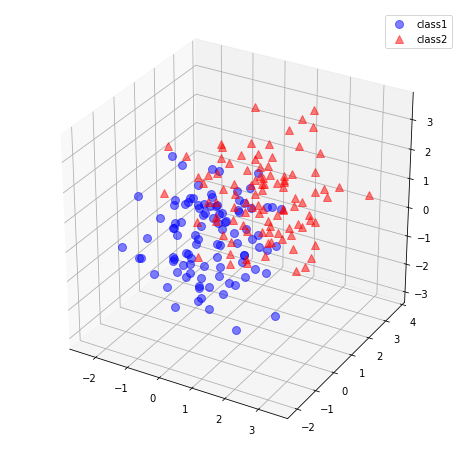

In [9]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 100).T

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 100).T

%pylab inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

ax.legend(loc='upper right')

plt.show()

Populating the interactive namespace from numpy and matplotlib


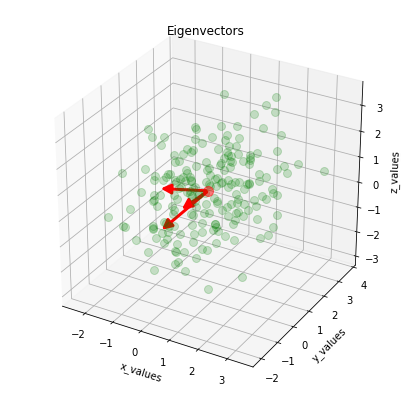

In [10]:
Y = np.concatenate((class1_sample, class2_sample), axis=1)

#scatter_matrix = np.zeros((3,3))
#for i in range(all_samples.shape[1]):
#    scatter_matrix += (Y[:,i].reshape(3,1) - np.mean(Y,axis=1)).dot((Y[:,i].reshape(3,1) - np.mean(Y[:,:],axis=1)).T)
cov_mat = np.cov([Y[0,:],Y[1,:],Y[2,:]])
# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(cov_mat)

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:,i].reshape(1,3).T

%pylab inline
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')

ax.plot(Y[0,:], Y[1,:], Y[2,:], 'o', markersize=8, color='green', alpha=0.2)
ax.plot([np.mean(Y[0,:])], [np.mean(Y[1,:])], [np.mean(Y[2,:])], 'o', markersize=10, color='red', alpha=0.5)
for v in eig_vec_cov.T:
    a = Arrow3D([np.mean(Y[0,:]), v[0]], [np.mean(Y[1,:]), v[1]], [np.mean(Y[2,:]), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
    ax.add_artist(a)
ax.set_xlabel('x_values')
ax.set_ylabel('y_values')
ax.set_zlabel('z_values')

plt.title('Eigenvectors')

plt.show()



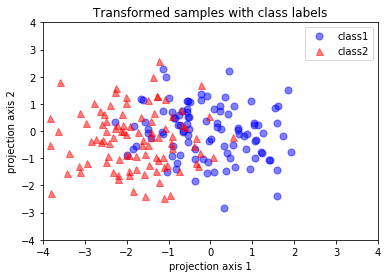

In [12]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_cov[i]), eig_vec_cov[:,i]) for i in range(len(eig_val_cov))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
transformed = matrix_w.T.dot(Y)
plt.plot(transformed[0,0:100], transformed[1,0:100], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,100:200], transformed[1,100:200], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('projection axis 1')
plt.ylabel('projection axis 2')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

In [14]:
np.mean(Y[:,:], axis=1)

array([0.59957647, 0.49323855, 0.62780662])

$\textbf{Question:}$ Include few $\textit{outlier}$ points to the synthetic Gaussian data. How does the projection changes and what do you notice? 

# Probabilistic principal component analysis (PCA)

Despite the intuitive statistical formulation of PCA above, standard PCA method cannot be seen as probabilistic. That means that there is no principled likelihood with which to estimate the quality of the fit of the lower-dimensional model, we cannot draw samples from the model, cannot interpolate missing values, and we cannot readily use the algorithm inside other probabilistic procedures, among other limitations.

In this section we address this issue by introducing a probabilistic approach to PCA which we refer to as $\textit{PPCA}$ algorithm. Let us consider the linear regression model 
\begin{equation}
Y = WX + \epsilon,\text{ with }W\in R^{D\times M} 
\end{equation}
In the usual interpretation of the regression model, the observed data are considered to be reasonably well "predicted" using some known predictors $X$. In dimensionality reduction, we assume that the data points are known but they can be well explained using their lower-dimensional hidden counterparts (which are unknown), and $M$ is typically much smaller than $D$ (which is often vice versa in the regression scenario). We will assume that the observation noise $\epsilon$ is spherical multivariate Gaussian. This leads to the following model for the observed variables:
\begin{equation}
f(y|x)=\mathcal{N}\left(y|Wx, \sigma^2\textbf{I}\right)
\end{equation}
A fully probabilistic (Bayesian) approach would also require a model for the hidden variables $x$ in the above expression. For the sake of simplicity, let us assume that they are standard multivariate Gaussian, $f(x)=\mathcal{N}(x|0,\textbf{I})$. The joint distribution of the data and the latent variables can therefore be written as: 
\begin{equation}
f\left(y,x|W,\sigma\right)=\mathcal{N}\left(y|Wx,\sigma^2\textbf{I}\right)\mathcal{N}\left(x|\textbf{0},\textbf{I}\right)
\end{equation}
Because of the Gaussian choice for distribution over the latent variables, we can use the marginalization properties of the Gaussian and write: 
\begin{equation}
f\left(y|W,\sigma^2\right)=\mathcal{N}\left(y|0,WW^T+\sigma\textbf{I}\right)
\end{equation}
with $WW^T+\sigma\textbf{I}$ being $D\times D$ covariance matrix which we will denote with $Q$ for shorter notation. Since we are interested in estimating the parameters $W$ and $\sigma^2$ and the distribution over $Z$ does not depend upon these parameters, we can estimate them by minimizing the negative log-likelihood of $Y$ independently of $X$. Using the expressions from above, feel encouraged to verify that the negative log-likelihood can be written as:
\begin{alignedat}{2}
E & = & -\ln\prod_{n=1}^Nf\left(y_n \lvert W,\sigma^2\right)\\
 & = & \frac{1}{2}\sum_{n=1}^N y_n^T Q^{-1} y_n\\
 & + & \frac{N}{D}\ln(2\pi) + \frac{N}{2}\ln\lvert Q \rvert\\
\end{alignedat}
$\textbf{Question:}$ Differentiate the negative log-likelihood above accordingly to show that the maximum likelihood estimators for $W$ and $\sigma^2$ are: $\hat{W}=U\left(\Lambda - \hat{\sigma}^2\textbf{I}\right)^{\frac{1}{2}}$ and $\hat{\sigma}^2=\frac{1}{D-M}\sum_{i=M+1}^{D}\lambda_i$ where $\Lambda$ is the $M\times M$ diagonal matrix of the largest $M$ eigenvalues $\lambda_i$ of the $D\times D$ sample covariance matrix $S=\frac{1}{N}XX^T$ and $U$ is the $D\times M$ matrix whose columns are the corresponding $M$ eigenvectors. 

This means that, as with the non-probabilistic PCA above, the estimates for $W$ and $\sigma^2$ require only the diagonalization of the covariance matrix. We can also see that $\sigma^2$ is just the squared error entailed by the projection from $D$ down to $M$ dimensions.
Typically when using dimensionality reduction model, the main quatity of interest are the lower dimensional latent variables (and their visualization). One key advantage of the PPCA compare to non-probabilistic alternatives is that it allows us to estimate the posterior distribution associated with these latent variables which governs not only their most likely values but also describes the uncertainty associated with them. The posterior for $x$ is:
\begin{equation}
f\left(x\lvert y, W, \sigma^2\right) = \mathcal{N}\left(x\lvert P^{-1}W^{T}y, \sigma^2 P^{-1}\right)
\end{equation} 
 with the $M\times M$ matrix $P = W^{T}W + \sigma^2\textbf{I}$. It is reasonable to summarize this distribution over the latent variables using their mean and using it when a point estimate is required to produce our visualization.
 
$\textbf{Relationship between PCA and PPCA:}$ It is interesting to consider how we can recover the original PCA algorithm starting from PPCA. Consider what happends to PPCA when we assume the variance $\sigma^2 \to 0$. In that case, the observation model $f \left(y\lvert x\right)$ collapses down onto its mean and there is no longer any well-defined likelihood, as with PCA. Also as with PCA, the projection of the data down onto the latent variables becomes the linear regression $Y = \left(W^{T}W\right)^{-1}W^{T}X = W^{T}X$ which coincides with the PCA projection up to a scale factor in each direction. Thus, PCA can be recovered as a special case of PPCA.

In [15]:
import numpy as np
from numpy.linalg import inv
from numpy import transpose as tr
#import ipdb

def PPCA_fit_ml(y, q=2, sigma=1.0):
    p = y.shape[0]
    n = y.shape[1]
    mu = np.mean(y, 1)[:, np.newaxis]
    [u, s, v] = np.linalg.svd(y - mu)
    if q > len(s):
        ss = np.zeros(q)
        ss[:len(s)] = s
    else:
        ss = s[:q]
        ss = np.sqrt(np.maximum(0, ss**2 - sigma))
        w = u[:, :q].dot(np.diag(ss))
        if q < p:
            sigma_hat = 1.0 / (p - q) * np.sum(s[q:]**2)
        else:
            sigma_hat = 0.0
            
        m = tr(w).dot(w) + sigma * np.eye(w.shape[1])
        m = inv(m)
        x = m.dot(tr(w)).dot(y - mu)    
        
        return (w, mu, sigma_hat, x)
    

In [16]:
import sklearn.datasets as ds
iris = ds.load_iris()
iris_y = np.transpose(iris.data)
iris_classes = iris.target

Let us have a look of what the actualy Iris dataset looks like in tabular format:

In [17]:
import pandas as pd

feature_dict = {i:label for i,label in zip(
                range(4),
                  ('sepal length in cm',
                  'sepal width in cm',
                  'petal length in cm',
                  'petal width in cm', ))}

df = pd.io.parsers.read_csv(
    filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
    header=None,
    sep=',',
    )
df.columns = [l for i,l in sorted(feature_dict.items())] + ['class label']
df.dropna(how="all", inplace=True) 

df.tail(10) #choose how many rows of the data you wish to see

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class label
140,6.7,3.1,5.6,2.4,Iris-virginica
141,6.9,3.1,5.1,2.3,Iris-virginica
142,5.8,2.7,5.1,1.9,Iris-virginica
143,6.8,3.2,5.9,2.3,Iris-virginica
144,6.7,3.3,5.7,2.5,Iris-virginica
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


We are ready to fit the maximum likelihood PPCA calling the following code:

In [20]:
w, mu, sigma_hat, x = PPCA_fit_ml(iris_y, q=2, sigma=1.0)

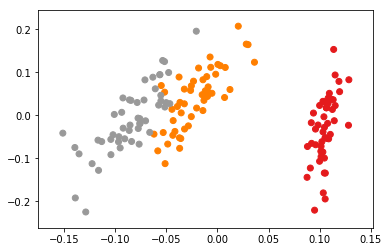

In [34]:
#plot_scatter(x, iris_classes)
plt.scatter(x[0, :], x[1, :],c=iris_classes, cmap=plt.cm.Set1)

While if we assume that the columns of $W$ are orthogonal, we can obtain closed form maximum likelihood estimates for $W$ and $\sigma^2$, in general this assumptions does not need to hold exactly. Furthermore, if we assume that some of the input data is missing an EM approach to PPCA can be more appropriate. In the EM approach to maximising the likelihood for PPCA, we consider the latent variables $x$ to be ‘missing’ data and the ‘complete’ data to comprise the observations together with these latent variables. The corresponding complete-data log-likelihood is then:
\begin{equation}
L = \sum_{n=1}^N \ln {f\left( y_n, x_n \right)}
\end{equation}
where from above we have:
\begin{equation}
f(y_n, x_n) = \left(2\pi\sigma^2\right)^{-\frac{d}{2}}\exp\left\{-\frac{\Vert{y_n - Wx_n - \mu\Vert}^2}{2\sigma^2}\right\}\left(2\pi\right)^{-\frac{q}{2}}\exp\left\{-\frac{\Vert{x_n\Vert}^2}{2}\right\}
\end{equation}
In the E-step, we take the expectation of $L$ with respect to the distributions $f\left(x_n\vert y_n, W, \sigma^2 \right)$: 
\begin{equation}
\textbf{E}_x[L] = -\sum_{n=1}^N \left\{\frac{d}{2}\ln\sigma^2 + \frac{1}{2}\text{tr}\left(\left<x_n x_n^T\right>\right) + \frac{1}{2\sigma^2}\left(y_n-\mu\right)^T\left(y_n-\mu\right) - \frac{1}{\sigma^2} \left<x_n\right>^T W^T \left(y_n - \mu\right) + \frac{1}{2\sigma^2}\text{tr}\left(W^T W\left<x_n x_n^T\right>\right)\right\}
\end{equation}
where terms independent of the model parameters have been omitted and we have used the notation:
\begin{alignedat}{2}
\left< x_n \right> &=& P^{-1}W^T\left(y_n - \mu\right)\\
\left< x_n x_{n}^{T} \right> &=& \sigma^2 P^{-1} + \left< x_n \right> \left<x_n \right>^T\\
\end{alignedat}
with $P = W^T W +\sigma^2 \textbf{I}$ as above.
In the M-step, $\textbf{E}_x[L]$ is maximised with respect to $W$ and $\sigma^2$ giving new parameter estimates. One efficient way to implement the EM algorithm for the PPCA is then to iterate between updating $\left< x_n \right>$ $\left< x_n x_{n}^{T} \right>$, $\tilde{W}$ and $\tilde{\sigma}^2$. 

$\textbf{Question}$: Differentiate $\textbf{E}_x[L]$ with respect to $W$ and $\sigma^2$ respectively to obtain the parameter updates $\tilde{W}$ and $\tilde{\sigma^2}$.


While the explained algorithm is computationally more efficient, if we substitute $\left< x_n \right>$ and $\left< x_n x_{n}^{T} \right>$ directly in the expressions for $\tilde{W}$ and $\tilde{\sigma}^2$, we can obtain algebraically more pleasant version of an EM algorithm for PPCA. The "simplified" EM combines the E-step and the M-step described above into modified updates for $\tilde{W}$ and $\tilde{\sigma}^2$:
\begin{alignedat}{2}
\tilde{W} &=& SW\left(\sigma^2 \textbf{I} + P^{-1}W^TSW\right)^{-1}\\
\tilde{\sigma}^2 &=& \frac{1}{d}\text{tr}\left(S-SWP^{-1}\tilde{W}^T\right)\\
\end{alignedat}
where note that we first use the old value of $W$ to update $\tilde{W}$ and then the updated $\tilde{W}$ to update $\tilde{\sigma}^2$; $S$ is just the covariance term $S=\frac{1}{N}\sum{n=1}^{N}\left(y_n - \mu\right)\left(y_n-\mu\right)^T$. Below we will see an implementation of the "simplified" EM algorithm for PPCA. 

$\textbf{Practical note:}$ Since the EM for PPCA is an iterative procedure, note that it will lead to different parameter estimates and projections for different initial conditions. Furthermore, dropping the explicit assumption for orthogonality of the columns of $W$, means that more often there will be multiple projections which lead to practically the same quality of fit (same total variance is explained using the first $M$ components, but the principal components are not uniquely defined). This means that using EM for PPCA we can obtain projections with different rotations as we restart, while traditional PCA (and ML PPCA implemented above) find a unique projection which decides on some rotation factor "on its own". To summarize, you should not be trusting PCA and maximum likelihood PPCA projections up to a rotation and if you want to explore differently rotated projections, run EM for PPCA multiple times with different initialization.  

# EM algorithm for PPCA

In [40]:
def PPCA_fit_em(y, q=2, sigma=1.0, maxiter=20):
    p = y.shape[0]
    n = y.shape[1]    
    w = np.random.rand(p, q)
    mu = np.mean(y, 1)[:, np.newaxis]
    ll = ell(y, w, mu, sigma) 
    yy = y - mu
    s = n**-1 * yy.dot(tr(yy))
    for i in range(maxiter):
        m = inv(tr(w).dot(w) + sigma * np.eye(q))
        t = inv(sigma * np.eye(q) + m.dot(tr(w)).dot(s).dot(w))
        w_new = s.dot(w).dot(t)
        sigma_new = p**-1 * np.trace(s - s.dot(w).dot(m).dot(tr(w_new)))
        ll_new = ell(y, w_new, mu, sigma_new)
       # print "{:3d}  {:.3f}".format(i + 1, ll_new)
        w = w_new
        sigma = sigma_new
        ll = ll_new
        
    m = tr(w).dot(w) + sigma * np.eye(w.shape[1])
    m = inv(m)
    x = m.dot(tr(w)).dot(y - mu) 
    return (w, mu, sigma, x)
    
       
def ell(y, w, mu, sigma, norm=True):
    p = y.shape[0]    
    n = y.shape[1] 
    m = inv(tr(w).dot(w) + sigma * np.eye(w.shape[1]))
    mw = m.dot(tr(w))
    ll = 0.0
    for i in range(n):
        yi = y[:, i][:, np.newaxis]
        yyi = yi - mu
        xi = mw.dot(yyi)
        xxi = sigma * m + xi.dot(tr(xi))
        ll += 0.5 * np.trace(xxi)
        if sigma > 1e-5:
            ll += (2 * sigma)**-1 * float(tr(yyi).dot(yyi))
            ll -= sigma**-1 * float(tr(xi).dot(tr(w)).dot(yyi))
            ll += (2 * sigma)**-1 * np.trace(tr(w).dot(w).dot(xxi))
    if sigma > 1e-5:
        ll += 0.5 * n * p * np.log(sigma)
    ll *= -1.0
    if norm:
        ll /= float(n)
    return ll    

In [41]:
w, mu, sigma_hat, x = PPCA_fit_em(iris_y, q=2, sigma=1.0)

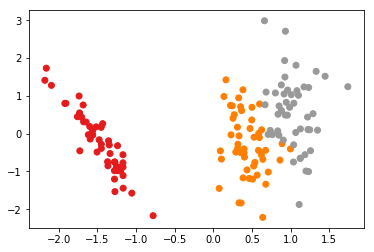

In [42]:
plt.scatter(x[0, :], x[1, :],c=iris_classes, cmap=plt.cm.Set1)

# Linear discriminant analysis

Linear Discriminant Analysis (LDA) is a very common and easy to interpret technique for both classification and dimensionality reduction tasks. It is common to use it as pre-processing or post-processing step to help us visualize high dimensional dimensional problems and separability of classes in high dimensional data. The goal in LCA is to project a dataset onto a lower-dimensional space with good class-separability. The LDA ensures class separability is by using the labels of the data to estimate the axes that maximize the separation between classes; hence unlike other methods in this section $\textbf{LDA requires class labels}$. The general LDA approach is very similar to PCA, but in addition to finding the component axes that maximize the variance of our data (PCA), we are also interested in the axes that maximize the separation between multiple classes. 


In [122]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df[4] = df[4].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

y, X = df.iloc[:, 4].values, df.iloc[:, 0:4].values
#X_cent = X - X.mean(axis=0)
#X_std = X_cent / X.std(axis=0)

In [117]:
print(X.shape)
print(y.shape)

(150, 4)
(150,)


/home/CAMPUS/raykovy/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


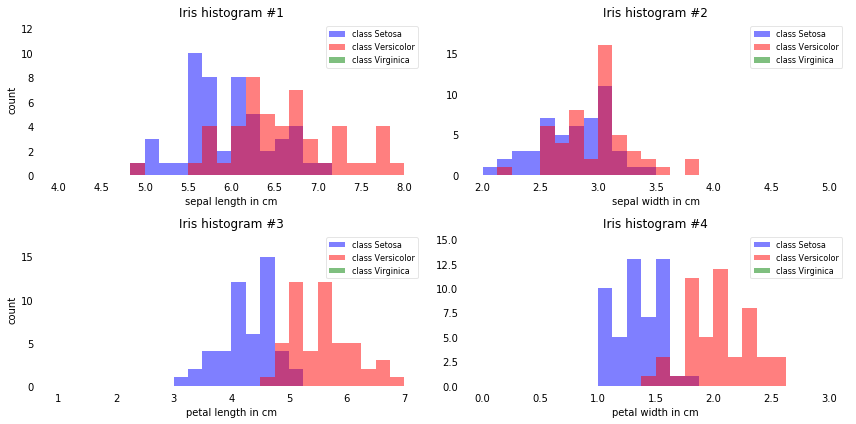

In [104]:
from matplotlib import pyplot as plt
import numpy as np
import math

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,6))
label_dict = {1: 'Setosa', 2: 'Versicolor', 3:'Virginica'}


for ax,cnt in zip(axes.ravel(), range(4)):  

    # set bin sizes
    min_b = math.floor(np.min(X[:,cnt]))
    max_b = math.ceil(np.max(X[:,cnt]))
    bins = np.linspace(min_b, max_b, 25)

    # plottling the histograms
    for lab,col in zip(range(1,4), ('blue', 'red', 'green')):
        ax.hist(X[y==lab, cnt],
                   color=col,
                   label='class %s' %label_dict[lab],
                   bins=bins,
                   alpha=0.5,)
    ylims = ax.get_ylim()

    # plot annotation
    leg = ax.legend(loc='upper right', fancybox=True, fontsize=8)
    leg.get_frame().set_alpha(0.5)
    ax.set_ylim([0, max(ylims)+2])
    ax.set_xlabel(feature_dict[cnt])
    ax.set_title('Iris histogram #%s' %str(cnt+1))

    # hide axis ticks
    ax.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

axes[0][0].set_ylabel('count')
axes[1][0].set_ylabel('count')

fig.tight_layout()       

plt.show()

Assume that data $Y_k$ from class $k$ is generated from a multivariate Gaussian with mean $\mu_k$ and a shared covariance $\Sigma$. Estimating the parameters is straighforward when we are given the class labels and their maximum likelihood estimates are:
\begin{alignedat}{2}
\hat{\mu}_k &=& \frac{1}{N_k}\sum_{i:z_i=k}x_i\\
\hat{\Sigma} &=& \frac{1}{N}\sum_{k=1}^K \sum_{i:z_i=k}\left(x_i - \hat{\mu_k}\right)\left(x_i - \hat{\mu_k}\right)^T\\
\end{alignedat}
where we have used $z_i$ to denote the label indicators for point $i$ and $K$ is the number of classes in the problem. Then LDA can be used as a classification technique defining the following decision boundary:
\begin{equation}
\hat{z} = \arg \min_{k\in 1,\dots, K} \left[ \frac{1}{2}\left(x_i - \hat{\mu_k}\right)^T \hat{\Sigma}^{-1}\left(x_i - \hat{\mu_k}\right) -\ln N_k + \ln N \right]
\end{equation}
where $N_k$ denotes the number of points that belong to class $k$.
Now the difference when trying to use LDA as a dimensionality reduction technique is that we do know the indicators $z_1,\dots,z_N$ however we want to use the discriminant boundary above to project data in fewer dimensions. In order to proceed to this, we will need to estimate two more quantities: the between class scatter matrix $S_b$ and the within class scatter matrix $S_w$. These can be estimated using:
\begin{equation}
S_w = \sum_{k=1}^K\sum_{i:z_i=k}\left(x_i - \hat{\mu_k}\right)\left(x_i - \hat{\mu_k}\right)^T\\ 
\end{equation}
for the within class scatter matrix which is obtained by re-weighting the contribution of each class specific covariance matrix and 
\begin{equation}
S_b = \sum_{k=1}^K N_i \left(\mu - \hat{\mu}_k\right)\left(\mu - \hat{\mu}_k\right)^T
\end{equation} 
where $\mu$ is just the mean of all the data: $\mu = \frac{1}{N}\sum_{i=1}^{N}x_i$.
From here we can continue like in PCA, but instead of solving the eigenvalue problem for the covariance matrix of the data, in LDA we apply eigenvalue decomposition on the matrix $S_w^{-1}S_b$.

Due to the simplicity of the underlying model, LDA has shown to be useful both for visualization and classification even in scenarious in which the Gaussian assumption does not hold strictly.


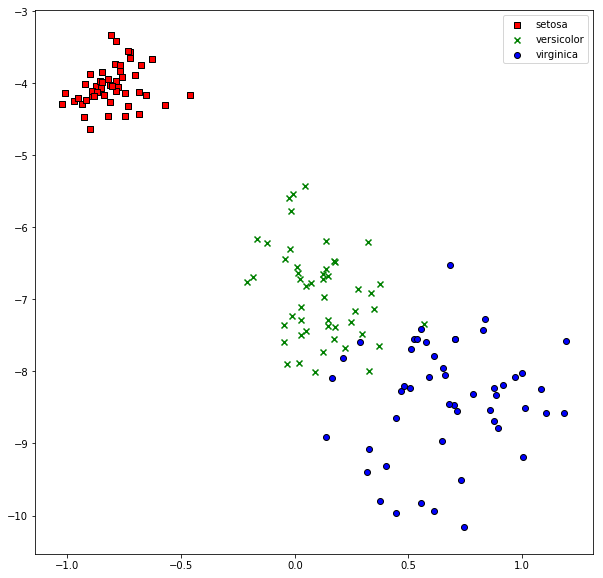

In [124]:
# Calculate the mean vectors per class
X = np.transpose(X) # Transpose in order to keep the expressions in the same form as the equations above 

mean_setosa = np.mean(X[:,y==0],axis=1).reshape(4,1) # Creates a 4x1 vector consisting of the means of the dimensions 
mean_versicolor = np.mean(X[:,y==1],axis=1).reshape(4,1) 
mean_virginica = np.mean(X[:,y==2],axis=1).reshape(4,1)

# Calculate the scatter matrices for the SW (Scatter within) and sum the elements up
scatter_setosa = np.dot((X[:,y==0]-mean_setosa),(X[:,y==0]-mean_setosa).T)
scatter_versicolor = np.dot((X[:,y==1]-mean_versicolor),(X[:,y==1]-mean_versicolor).T)
scatter_virginica = np.dot((X[:,y==2]-mean_virginica),(X[:,y==2]-mean_virginica).T)

# Calculate the SW by adding the scatters within classes 
SW = scatter_setosa+scatter_versicolor+scatter_virginica
mu = np.mean(X,axis=1)

# Calculate the SB 
SB = np.sum(y==0)*np.dot((mu - mean_setosa),(mu - mean_setosa).T) + np.sum(y==1)*np.dot((mu - mean_versicolor),(mu - mean_versicolor).T) + np.sum(y==2)*np.dot((mu - mean_virginica),(mu - mean_virginica).T)

# Compute the Eigenvalues and Eigenvectors of SW^-1 SB
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

# Select the two largest eigenvalues 
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

# Transform the data with Y=X*w
X = np.transpose(X) # Transpose in order to keep the expressions in the same form as the equations above 
ProjectedX = X.dot(w)
# Plot the data
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
color_legend = ['setosa','versicolor','virginica']
for l,c,m in zip(np.unique(y),['r','g','b'],['s','x','o']):
    ax0.scatter(ProjectedX[y==l,0],
                ProjectedX[y==l,1],
               c=c, marker=m, label=color_legend[l],edgecolors='black')
ax0.legend(loc='upper right')
